# **Introduction**

## Context
 
Imagine that you are a data analyst working for The Johns Hopkins Hospital. Your team is asked to create a machine learning model, which could predict if the patient is likely to get a stroke - being able to determine which patients have high stroke risk will allow your doctors to advise them and their families on how to act in case of an emergency.

## Objectives

Practice:
- working with CSV files.
- performing EDA.
- applying statistical inference procedures.
- using various types of machine learning models.
- building ensembles of machine learning models.
- deploying machine learning models.
- visualizing data with Matplotlib & Seaborn.
- reading data, performing queries, and filtering data.

## Requirements

- Download the data from [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, and checking for correlations and other relations between variables and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, and conducting z or t-tests for these hypotheses.
- Apply various machine learning models to predict the "stroke" column using all other features. This should include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. Suggestion: you might want to investigate how to use scikit-learn pipelines to make your training pipelines more robust.
- Deploy the machine learning model. Choose the best performing model and deploy it. You are free to choose any deployment option that you like - you can deploy your model in a container (on your computer or on a server), do a serverless deployment on the cloud, or even deploy and serve it on the browser as a web app.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Dataset

[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information:
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


# **First steps**

This chapter for focuses on all the necessary steps to start the project. The required libraries will be imported, default values (if any) will be set, the dataset will be loaded, and the first exploratory data analysis will be performed.

## Importing libraries

The following libraries will be used in this project:
- polars: to work with dataframes.
- numpy: to work with numerical operations.
- plotly: to create interactive plots.
- scikit-learn: to create machine learning models.
- scipy: to perform statistical tests.

Libraries and code will be wrapped in custom modules to make the code more readable and reusable, so only the necessary functions will be exposed to the user.

Custom modules:
 - "custom_modules.custom_functions": contains custom functions that wrap the libraries and code.
 - "custom_modules.constants": contains constants used in the project.

In [2]:
# custom modules
from custom_modules.custom_functions import load_dataset, get_unique_values, combine_data, upsample_minority_class
from custom_modules.custom_functions import plot_numerical_outliers, plot_bar_data, plot_points_subplots, plot_correlation_heatmap, plot_numeric_scatter, plot_catplot
from custom_modules.custom_functions import plot_violin
from custom_modules.custom_functions import continous_continous_correlation_matrix, categorical_categorical_correlation_matrix, plot_continous_categorical_correlation_matrix
from custom_modules.custom_functions import shapiro_wilk_normality_test_matrix, levene_variance_test, t_test, means_difference_and_ci, chi_square_test_matrix
from custom_modules.constants import RNG

# base modules
import polars as pl

# graphing
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# sklearn
from sklearn.model_selection import train_test_split

## Loading the dataset

This project uses the "Stroke Prediction Dataset" dataset, which is available on Kaggle. Function will check if file is available and load it into a Polars DataFrame. If the file is not available, it will be downloaded from the Kaggle API.

In [3]:
df = load_dataset()

Dataset already downloaded


In [4]:
df.head()

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,str,str,i64
9046,"""Male""",67.0,0,1,"""Yes""","""Private""","""Urban""",228.69,"""36.6""","""formerly smoked""",1
51676,"""Female""",61.0,0,0,"""Yes""","""Self-employed""","""Rural""",202.21,"""N/A""","""never smoked""",1
31112,"""Male""",80.0,0,1,"""Yes""","""Private""","""Rural""",105.92,"""32.5""","""never smoked""",1
60182,"""Female""",49.0,0,0,"""Yes""","""Private""","""Urban""",171.23,"""34.4""","""smokes""",1
1665,"""Female""",79.0,1,0,"""Yes""","""Self-employed""","""Rural""",174.12,"""24""","""never smoked""",1


## Data Overview

The first step is to get an overview of the data. 

The following information will be displayed:
- Data description.
- Data types.
- Missing values.
- Unique values.
- Duplicates.

### Data description

The data description will be displayed to give an overview of the dataset.

In [5]:
df.describe()

statistic,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
str,f64,str,f64,f64,f64,str,str,str,f64,str,str,f64
"""count""",5110.0,"""5110""",5110.0,5110.0,5110.0,"""5110""","""5110""","""5110""",5110.0,"""5110""","""5110""",5110.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,"""0""","""0""","""0""",0.0,"""0""","""0""",0.0
"""mean""",36517.829354,null,43.226614,0.097456,0.054012,null,null,null,106.147677,null,null,0.048728
"""std""",21161.721625,null,22.612647,0.296607,0.226063,null,null,null,45.28356,null,null,0.21532
"""min""",67.0,"""Female""",0.08,0.0,0.0,"""No""","""Govt_job""","""Rural""",55.12,"""10.3""","""Unknown""",0.0
"""25%""",17740.0,null,25.0,0.0,0.0,null,null,null,77.24,null,null,0.0
"""50%""",36942.0,null,45.0,0.0,0.0,null,null,null,91.89,null,null,0.0
"""75%""",54695.0,null,61.0,0.0,0.0,null,null,null,114.09,null,null,0.0
"""max""",72940.0,"""Other""",82.0,1.0,1.0,"""Yes""","""children""","""Urban""",271.74,"""N/A""","""smokes""",1.0


From the description we can see that the dataset has 5110 rows for 12 features. While describe method shows null_count for each column as 0, the head method shows that there are missing values at least in bmi column. This is possibly due to it being a string representation "N/A". These missing values will be handled in scikit-learn pipelines, with imputation strategies.

### Data types

The data types of each column will be displayed.

In [6]:
df.schema

Schema([('id', Int64),
        ('gender', String),
        ('age', Float64),
        ('hypertension', Int64),
        ('heart_disease', Int64),
        ('ever_married', String),
        ('work_type', String),
        ('Residence_type', String),
        ('avg_glucose_level', Float64),
        ('bmi', String),
        ('smoking_status', String),
        ('stroke', Int64)])

Again some steps can be taken to improve the data types. For example removing redundancy in column types, such as converting "age" to integer type (int8, assuming that the age is full number, and floats are outliers). As well working on converting binary columns to boolean type, string to category type, and so on.

All of this will be done in scikit-learn pipeline steps.

### Duplicate values

The dataset will be checked for duplicate values.

In [7]:
df.is_duplicated().sum()

0

Since data is collected from patients, with each having an unique id, there should be no duplicate values and duplicate count supported this.

In further steps, the id column will be dropped, as it is not a feature that can be used in the model.

### Unique values / Missing values

The unique values of each column will be displayed to get an overview of the data, as well as checking for "N/A" values.

In [8]:
with pl.Config(tbl_rows=15, tbl_width_chars=100, fmt_str_lengths=100):
    display(get_unique_values(df))

Column,Column Type,Unique Values Count,Unique Values,Contains N/A
str,object,i64,str,bool
"""id""",Int64,5110,"""More than 5 unique values""",false
"""gender""",String,3,"""Male, Other, Female""",false
"""age""",Float64,104,"""More than 5 unique values""",false
"""hypertension""",Int64,2,"""0, 1""",false
"""heart_disease""",Int64,2,"""0, 1""",false
"""ever_married""",String,2,"""No, Yes""",false
"""work_type""",String,5,"""Self-employed, Govt_job, Private, children, Never_worked""",false
"""Residence_type""",String,2,"""Rural, Urban""",false
"""avg_glucose_level""",Float64,3979,"""More than 5 unique values""",false


Again this confirms that no duplicates should be present in the dataset, due to unique values in "id" column being consistent with the number of rows.

"age" column is suspicious, as it has 104 unique values, which is not expected for age, but not unheard of. Previous steps showed that at least some float values are present

Everything else is as expected, with binary columns having 2 unique values, and categorical columns having more than 2 unique values.

## Interim summary

The first steps of the project have been completed. The necessary libraries have been imported, the dataset has been loaded, and the first exploratory data analysis has been performed. 

The dataset contains missing values which will be handled in scikit-learn pipelines using imputation methods.

The data types will be improved in scikit-learn pipelines, by converting columns to more appropriate types e.g. "ever_married" to boolean, "work_type" to category, etc.

As well there is a possibility of invalid values in "age" column, which will be investigated further.

# **Data splitting**

To avoid data leakage, biases, and overfitting, the data will be split into training and testing sets. The training set will be used to train the model, while the testing set will be used to evaluate the model. It is done so early in the project to avoid any potential biases in the exploratory data analysis.

Data is split into 80% training and 20% testing sets.

Random state is set to 42 to ensure reproducibility.

Stratification is used to ensure that the distribution of the target variable is the same in both training and testing sets.

"id" column is dropped, as it is not a feature that can be used in the model.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["stroke", "id"]), df["stroke"], test_size=0.2, random_state=RNG, stratify=df["stroke"])
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (4088, 10)
X_test shape: (1022, 10)


# **Exploratory Data Analysis**

This chapter focuses on the exploratory data analysis. The data will be analyzed to find patterns, correlations, and other relations between variables. This will help to understand the data better and to make better decisions for the machine learning model.

## Sidenote

Training set will be recombined with the target variable for EDA, as it is not necessary to split the target variable from the training set for EDA. And binary columns answers will be converted to Yes/No for better readability (including "stroke").

In [10]:
df = combine_data(X_train, y_train, ["hypertension", "heart_disease", "stroke"])
df.head()   

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
str,f64,str,str,str,str,str,f64,str,str,str
"""Female""",48.0,"""No""","""No""","""Yes""","""Private""","""Urban""",69.21,"""33.1""","""never smoked""","""No"""
"""Male""",15.0,"""No""","""No""","""No""","""Private""","""Rural""",122.25,"""21""","""never smoked""","""No"""
"""Female""",67.0,"""No""","""No""","""Yes""","""Self-employed""","""Rural""",110.42,"""24.9""","""never smoked""","""No"""
"""Male""",44.0,"""No""","""No""","""Yes""","""Private""","""Urban""",65.41,"""24.8""","""smokes""","""No"""
"""Male""",14.0,"""No""","""No""","""No""","""Govt_job""","""Urban""",82.34,"""31.6""","""Unknown""","""No"""


## Target column distribution

The distribution of the target column will be checked to see how balanced the dataset is. Due to stratification used, the distribution should be similar to the original dataset.

In [11]:
df["stroke"].value_counts()

stroke,count
str,u32
"""Yes""",199
"""No""",3889


As suspected, the dataset is imbalanced, with the majority of patients not having a stroke. This will be taken into account when building the machine learning model.

## Numerical features and Outliers

This section focuses on numerical features and their outliers to try and spot any patterns or anomalies in the data.

This is done by creating box plots for each numerical feature.

In [12]:
plot_numerical_outliers(df, ["age", "avg_glucose_level", "bmi"])

One feature where two groups differ significantly (at least visually) is "age". Patients who had a stroke seem to be older than those who did not have a stroke. This is a good sign that the feature might be useful in predicting the target variable.

There doesn't seem to be a significant difference in other numerical features, but this will be further investigated in the next steps.

In [13]:
(df["age"] < 1).value_counts()

age,count
bool,u32
false,4054
true,34


There are 34 patients with age being lower than 1, which could suggest infants or an issue with data collection. 

There is as well a patient age 1.32 who had a stroke. This could be a data collection issue, or a valid data point, either way as far as strokes are concerned, it is an outlier. 

As data will be normalized in scikit-learn pipelines, this should not be an issue.

## Categorical features

This section focuses on categorical features and their distribution to try and spot any patterns or anomalies in the data.

In [14]:
plot_bar_data(df, cat_columns=["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"], target="stroke")

It is hard to tell if there is any significant difference in the distribution of categorical features between patients who had a stroke and those who did not.

In [15]:
plot_points_subplots(df, "stroke", "Yes", 0.95, ["gender", 
                                                 "hypertension", 
                                                 "heart_disease", 
                                                 "ever_married", 
                                                 "work_type", 
                                                 "Residence_type", 
                                                 "smoking_status"])

When looking over the percentages of patients who had a stroke, it seems that patients who have hypertension, heart disease, have ever married, smoked in the past or are self-employed are more likely to have a stroke. This perhaps is a good sign that these features might be useful in predicting the target variable.

The question here is how significant these differences are, and if they are significant enough to be used in the model. As well as how these features interact with each other, for example ever married - does this mean that married people are more likely to have a stroke, or are there some more underlying factors like age at play.

## Correlations

This section focuses on correlations between features and the target variable to try and spot any patterns or anomalies in the data.

### Numerical features

The correlation matrix will be displayed to show the correlation between numerical features.

To plot rough correlation between numerical features the "N/A" values will be imputed with the mean value of the column.

In [16]:
mean_bmi = df.filter(pl.col("bmi") != "N/A")["bmi"].cast(pl.Float32).mean()
filled_bmi = df.select(pl.col("bmi").replace({"N/A": str(mean_bmi)})).cast(pl.Float32)["bmi"]
df = df.select(pl.all().exclude("bmi")).with_columns(filled_bmi)

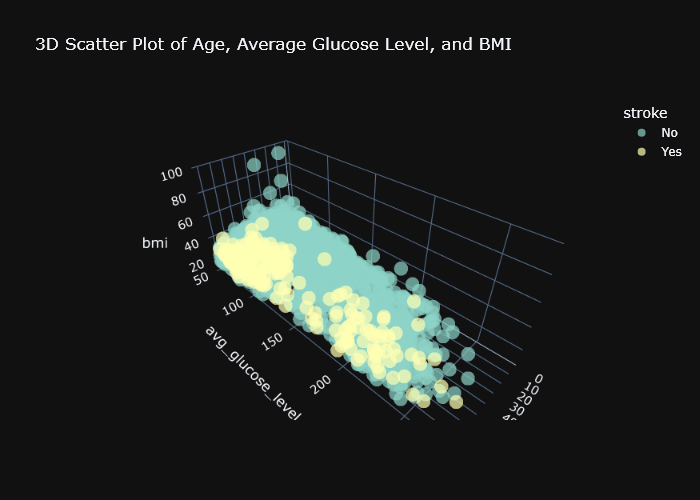

In [17]:
import plotly.io as pio
pio.renderers.default = "notebook_connected+png"
px.scatter_3d(df, x="age", y="avg_glucose_level", z="bmi", color="stroke", opacity=0.7, title="3D Scatter Plot of Age, Average Glucose Level, and BMI").show(renderer="png")

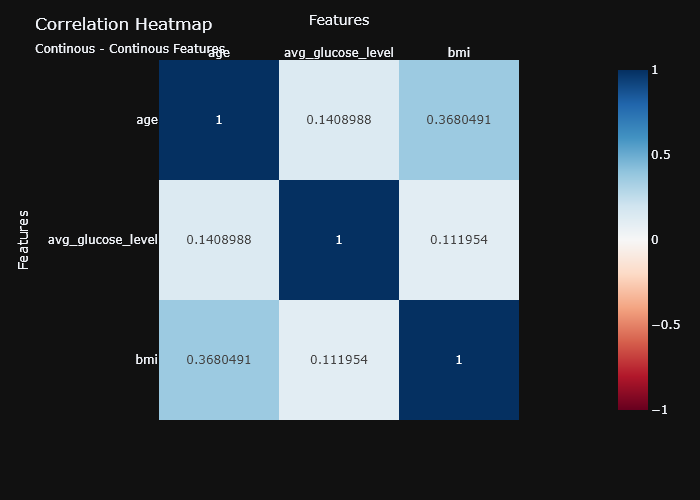

In [34]:
plot_correlation_heatmap(continous_continous_correlation_matrix(df["age", 'avg_glucose_level', "bmi"])).show(renderer="png")

There is low-moderate correlation between age and bmi features, no other significant correlations are present.

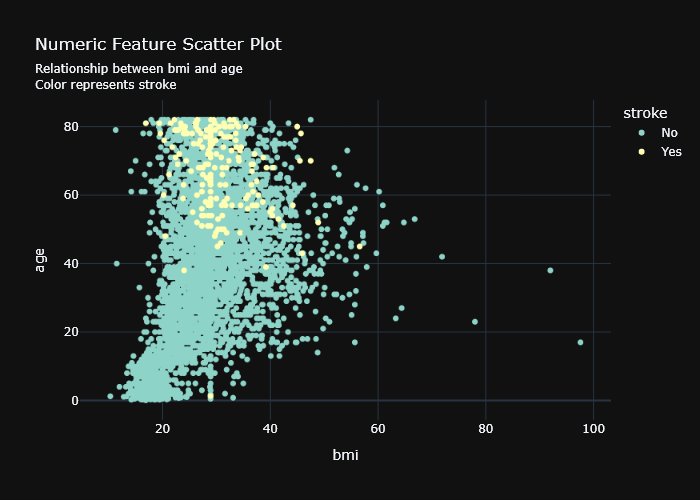

In [19]:
plot_numeric_scatter(df, ["bmi", "age"], "stroke")

From the scatter plot it is visible that there is some relationship between age and bmi.

From the scatter plot it also visible that a higher amount of patients who had a stroke have higher bmi values, with anything above 25 being considered overweight.

### Categorical Association

The association between categorical features and the target variable will be displayed.


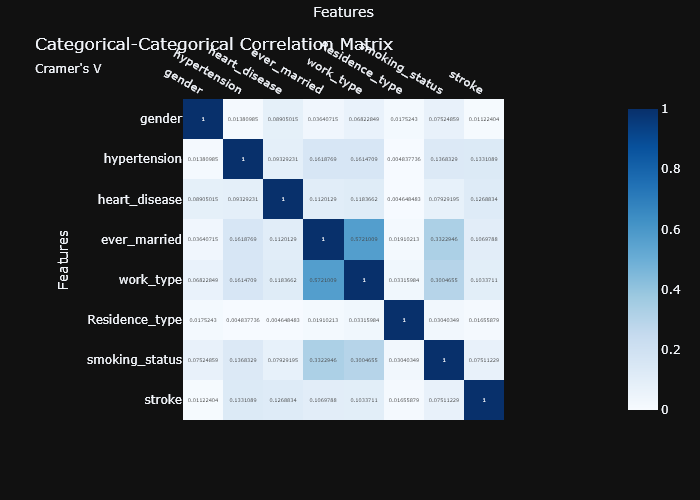

In [20]:
plot_correlation_heatmap(data=categorical_categorical_correlation_matrix(df.select(pl.col(pl.String))),
                         title="Categorical-Categorical Correlation Matrix",
                         color_scale="Blues",
                         zmin=0,
                         sub_title="Cramer's V")


There doesn't seem to be a significant association between categorical features and the target variable. 

There is some association between ever_married and work_type features, as well as these two features and smoking_status.

Another point to consider is that the Cramer's V test is not the best test for this dataset, as it is unbalanced, and the test is more suited for balanced datasets. Perhaps upsampling or downsampling could be used to balance the dataset, or another test could be used. 

It this case it is not clear if the features are associated with the target variable.

#### Upsampling

In this case a simple resampling technique will be used to balance the dataset. Which will copy the rows of the minority class to match the majority class.

Alternatively, SMOTE (Synthetic Minority Over-sampling Technique) could be used to generate synthetic samples for the minority class. However, this technique requires additional libraries to be installed, and it is not clear if it is necessary in this case.

Upsampling like this is only done for the EDA, because if used in the model, it could lead to overfitting.

For machine learning models, the dataset will be considered as is, but more robust ideas will be considered to handle the imbalance,- like loss functions or appropriate classfiers.

In [21]:
df_upsampled = upsample_minority_class(df, "stroke", "Yes")
df_upsampled

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
str,f64,str,str,str,str,str,f64,str,str,f32
"""Female""",48.0,"""No""","""No""","""Yes""","""Private""","""Urban""",69.21,"""never smoked""","""No""",33.099998
"""Male""",15.0,"""No""","""No""","""No""","""Private""","""Rural""",122.25,"""never smoked""","""No""",21.0
"""Female""",67.0,"""No""","""No""","""Yes""","""Self-employed""","""Rural""",110.42,"""never smoked""","""No""",24.9
"""Male""",44.0,"""No""","""No""","""Yes""","""Private""","""Urban""",65.41,"""smokes""","""No""",24.799999
"""Male""",14.0,"""No""","""No""","""No""","""Govt_job""","""Urban""",82.34,"""Unknown""","""No""",31.6
…,…,…,…,…,…,…,…,…,…,…
"""Male""",59.0,"""No""","""No""","""Yes""","""Self-employed""","""Rural""",118.03,"""smokes""","""Yes""",35.5
"""Female""",69.0,"""No""","""No""","""Yes""","""Govt_job""","""Urban""",82.81,"""never smoked""","""Yes""",28.0
"""Male""",82.0,"""No""","""Yes""","""Yes""","""Private""","""Rural""",208.3,"""Unknown""","""Yes""",32.5


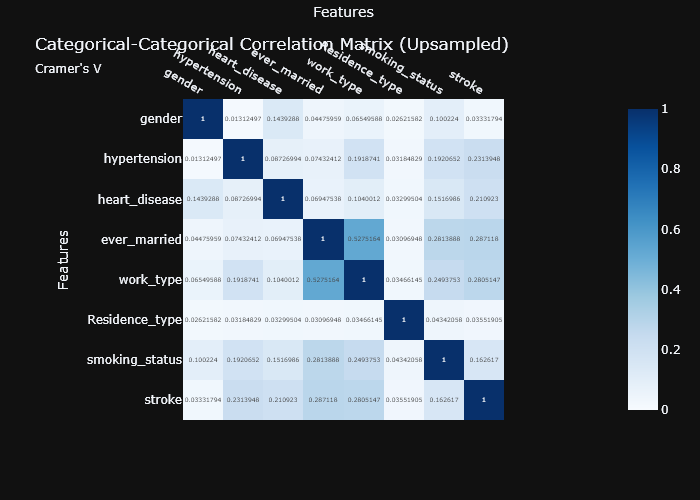

In [22]:
plot_correlation_heatmap(data=categorical_categorical_correlation_matrix(df_upsampled.select(pl.col(pl.String))),
                         title="Categorical-Categorical Correlation Matrix (Upsampled)",
                         color_scale="Blues",
                         zmin=0,
                         sub_title="Cramer's V")

Upon upsampling, the association between categorical features and the target variable is more visible. However, the association is still not significant to say that the features are useful in predicting the target variable.

#### Categorical Point Plots

The point plots will be displayed to show the relationship between categorical features and the target variable.

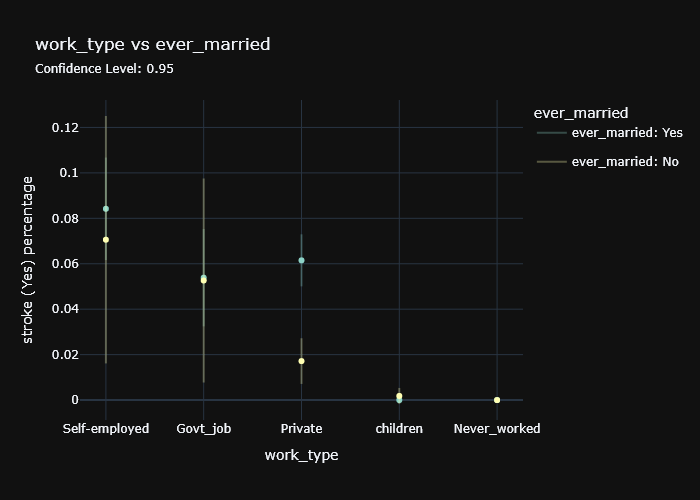

In [23]:
plot_catplot(df, ["work_type", "ever_married"], "stroke", "Yes", 0.95)

Again the graphs suggest that if a patient has ever married, they are more likely to have a stroke. Most of the difference comes from "Private" work type, where the difference between ever married patients is the highest in terms of stroke percentage. 

This could be due to age, as older people are more likely to have a stroke, and older people are more likely to be married. This will be investigated further down the line. 

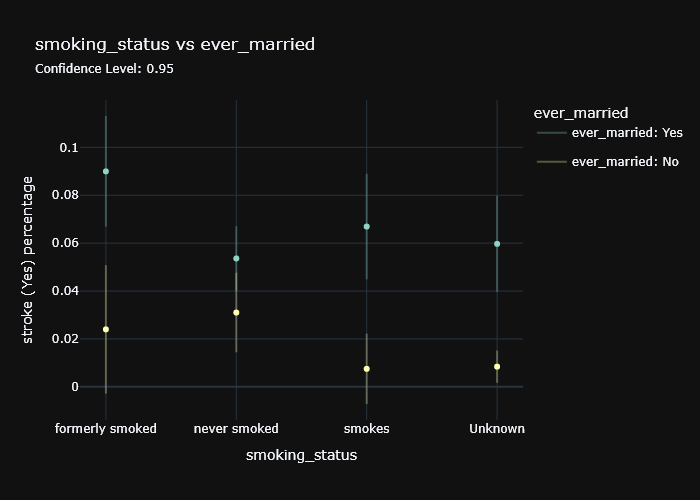

In [24]:
plot_catplot(df, ["smoking_status", "ever_married"], "stroke", "Yes", 0.95)

The data suggests that if a patient has ever smoked and is married, they are more likely to have a stroke. 

Again it is yet unclear how being married leads to a higher chance of having a stroke, and if there are any underlying factors at play.

### Numeric - Categorical Correlation

The correlation between numerical and categorical features will be displayed.

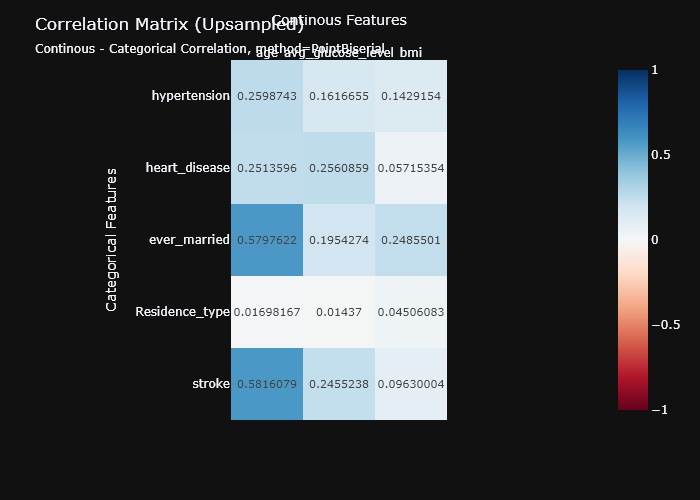

In [25]:
plot_continous_categorical_correlation_matrix(data=df_upsampled,
                                              categorical_columns=df.select(pl.col(pl.String)).columns,
                                              continous_columns=df.select(pl.all().exclude(pl.String)).columns,
                                              title="Correlation Matrix (Upsampled)")

If using upsampling, the correlation between numerical and categorical features is more visible. And there is medium-to-high correlation between age and stroke/ever_married features.

If using the original dataset, the correlation between numerical and categorical features is smaller in value but still present.

So this essentially confirms the previous findings, that age is a significant feature in predicting the target variable. Another point to consider is the correlation between age and ever_married, previous findings suggest that if a patient is ever married, they are more likely to have a stroke. This could be due to age, as older people are more likely to be married, and older people are more likely to have a stroke.

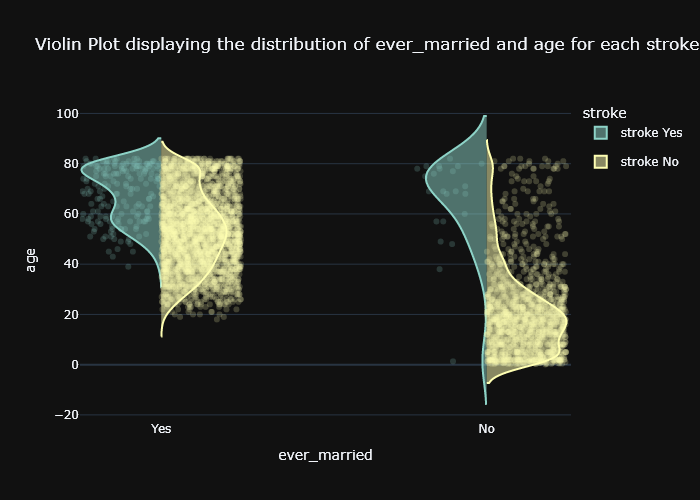

In [26]:
plot_violin(df, "stroke", ["ever_married", "age"])

It is unclear if ever_married is a significant feature in predicting the target variable, it looks like it is just a proxy for age.

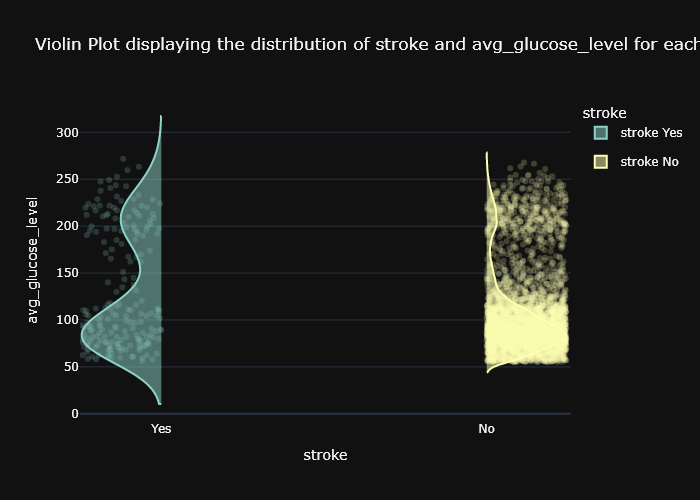

In [27]:
plot_violin(df, "stroke", ["stroke", "avg_glucose_level"])

As far as avg_glucose_level and stroke feature is concerned, it is hard to tell if there is any significant correlation between the two features. The median is slightly higher for patients who had a stroke, but the difference is not significant.

## Interim summary

The exploratory data analysis has shown that there is some relationship between age and the target variable. Patients who had a stroke seem to be older than those who did not have a stroke. This is a good sign that the feature might be useful in predicting the target variable.

As far as other features are concerned, it is hard to tell if they are significant in predicting the target variable. There is some association between categorical features and the target variable, but it is not significant enough to say that the features are useful in predicting the target variable.

The dataset is imbalanced, with the majority of patients not having a stroke. This will be taken into account when building the machine learning model.

# **Statistical Inference**

This chapter focuses on statistical inference. The target population will be explored, multiple statistical hypotheses will be formed and tested.

Significance level: 0.05

Confidence level: 95%

## Difference in means

The difference in means between patients who had a stroke and those who did not have a stroke will be tested for numerical features. Assumption here is that if there is a significant difference in means, the feature is useful in predicting the target variable.

Features that will be tested:
- age
- avg_glucose_level
- bmi

### Normality test

One of the assumptions of the t-test is that the data is normally distributed. The Shapiro-Wilk test will be used to test for normality.

Null hypothesis: the data is normally distributed.

Alternative hypothesis: the data is not normally distributed.

Significance level: 0.05

In [28]:
shapiro_wilk_normality_test_matrix(df["age", "bmi", "avg_glucose_level", "stroke"], "stroke")

stroke,Column,Statistic,PValue
str,str,f64,f64
"""Yes""","""age""",0.8917,8.2888e-11
"""Yes""","""bmi""",0.92583,1.7014e-8
"""Yes""","""avg_glucose_level""",0.870416,5.1292e-12
"""No""","""age""",0.97006,9.1727e-28
"""No""","""bmi""",0.94719,2.9402e-35
"""No""","""avg_glucose_level""",0.805585,4.9169e-56


In [29]:
df["stroke"].value_counts()

stroke,count
str,u32
"""Yes""",199
"""No""",3889


None of the numerical features are normally distributed, which suggests that the t-test might not be the best test to use in this case. However, the t-test is robust to violations of normality, as well as the consideration of Central Limit Theorem can come into play, which states that the distribution of sample means approaches a normal distribution as the sample size gets larger.

Considering the sample size for both groups is large enough, the t-test can be used (199 samples for having a stroke, 3889 samples for not having a stroke), again due to the Central Limit Theorem.

### Comparing Variance

T-test assumes that the variances of the two groups are equal. The Levene's test will be used to test for equal variances due to features not being normally distributed.

Null hypothesis: the variances of the two groups are equal.

Alternative hypothesis: the variances of the two groups are not equal.

In [30]:
levene_variance_test(df, ["age", "bmi", "avg_glucose_level", "stroke"], "stroke", ["Yes", "No"])

Column,Statistic,PValue
str,f64,f64
"""age""",111.143058,1.1721e-25
"""bmi""",24.08249,9.5893e-7
"""avg_glucose_level""",76.218291,3.6413e-18


Levene's test results suggest that the variances of the two groups are not equal. Since the variances are not equal, the Welch's t-test will be used to test for the difference in means.

### Welch's t-test

The Welch's t-test will be used to test for the difference in means between patients who had a stroke and those who did not have a stroke.

Null hypothesis: there is no difference in means between patients who had a stroke and those who did not have a stroke.

Alternative hypothesis: there is a difference in means between patients who had a stroke and those who did not have a stroke.

In [31]:
t_test(df, ["age", "bmi", "avg_glucose_level", "stroke"], "stroke", ["Yes", "No"])

Column,Statistic,PValue
str,f64,f64
"""age""",27.931077,2.4446e-82
"""bmi""",3.323724,0.001029
"""avg_glucose_level""",5.908952,1.3890e-8


In all cases, the p-value is less than the significance level, which suggests that there is a significant difference in means between patients who had a stroke and those who did not have a stroke. This is a good sign that the features might be useful in predicting the target variable.

In [32]:
means_difference_and_ci(df, ["age", "bmi", "avg_glucose_level", "stroke"], "stroke", ["Yes", "No"], 0.95)

Column,Mean_A (Yes),Mean_B (No),Difference,CI_Lower,CI_Upper
str,f64,f64,f64,f64,f64
"""age""",67.664925,42.109262,25.555663,23.754471,27.356854
"""bmi""",30.283521,28.85252,1.431001,0.582815,2.279186
"""avg_glucose_level""",131.389799,105.034202,26.355597,17.562494,35.148701


In all the cases, the mean of the patients who had a stroke is higher than the mean of the patients who did not have a stroke. This is consistent with the exploratory data analysis, where it was shown that patients who had a stroke seem to be older than those who did not have a stroke. Confidence intervals also support this, as they do not contain 0.

## Difference in proportions

The difference in proportions between patients who had a stroke and those who did not have a stroke will be tested for categorical features. Assumption here is that if there is a significant difference in proportions, the feature is useful in predicting the target variable.

Features that will be tested:
- gender
- hypertension
- heart_disease
- ever_married
- work_type
- Residence_type
- smoking_status

### Chi-square test

The Chi-square test for Homogeneity will be used to test for the difference in proportions between patients who had a stroke and those who did not have a stroke.

Null hypothesis: there is no difference in proportions between patients who had a stroke and those who did not have a stroke.

Alternative hypothesis: there is a difference in proportions between patients who had a stroke and those who did not have a stroke.

In [33]:
chi_square_test_matrix(df.select(pl.col(pl.String)), target_col="stroke")

Feature,Chi-Square,P-Value
str,f64,f64
"""gender""",0.515003,0.772981
"""hypertension""",70.357308,4.9479e-17
"""heart_disease""",63.232778,1.8367e-15
"""ever_married""",45.741062,1.3496e-11
"""work_type""",43.682652,7.4671e-9
"""Residence_type""",0.97228,0.324112
"""smoking_status""",23.063909,0.000039


Some of the values have different distributions, which suggests that there is a significant difference in proportions between patients who had a stroke and those who did not have a stroke,- this should help in predicting the target variable.

On the other hand it is hard to tell how the features interact with each other or the target variable. For example how does being married lead to a higher chance of having a stroke, or are there some more underlying factors at play. Current idea is that age is a significant factor in predicting the target variable, and other features are just proxies (confounding) for age.  

## Interim summary

The statistical inference has shown that there is a significant difference between patients who had a stroke and those who did not have a stroke. This is true for both numerical and categorical features. Although for categorical features it is hard to tell how the features interact with the target variable.

For numerical features, the difference in means is significant, which suggests that if values are higher, the patient is more likely to have a stroke. This is consistent with the exploratory data analysis, where it was shown that patients who had a stroke seem to be older than those who did not have a stroke.


# **Machine Learning Models**

This chapter focuses on building machine learning models. Various machine learning models will be applied to predict the "stroke" column using all other features. This will include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods.

Key considerations:
- The dataset is imbalanced, with the majority of patients not having a stroke. This will be taken into account when building the machine learning model.
    - Loss functions or appropriate classifiers can be considered to handle the imbalance.
    - SMOTE (Synthetic Minority Over-sampling Technique) could be used to generate synthetic samples for the minority class.
- The dataset contains missing values in the "bmi" column. These missing values can be handled in scikit-learn pipelines using imputation methods.
- Normalization, this can be done in scikit-learn pipelines.